# Handwritten Digit Recognition - Comparing KNN, Random Forest, and Decision Tree


In [1]:
# importing all the neccessary libraires
import time
from sklearn.datasets import fetch_openml, load_digits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# fectching the dataset from sklearn library
mnist = fetch_openml("mnist_784")
mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0           0       0       0       0       0       0       0       0       0   
 1           0       0       0       0       0       0       0       0       0   
 2           0       0       0       0       0       0       0       0       0   
 3           0       0       0       0       0       0       0       0       0   
 4           0       0       0       0       0       0       0       0       0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995       0       0       0       0       0       0       0       0       0   
 69996       0       0       0       0       0       0       0       0       0   
 69997       0       0       0       0       0       0       0       0       0   
 69998       0       0       0       0       0       0       0       0       0   
 69999       0       0       0       0       0       0       0       0       0   
 
      

In [3]:
# converted the mnist dataset from dictionary to pandas dataframe
mnist_df =pd.DataFrame(data = mnist.data,columns=mnist.feature_names)
mnist_df.insert(0,'target',mnist.target)
mnist_df.to_csv("mnist_df")

In [4]:
# displaying the first five rows
mnist_df.head()

,target,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# displaying the last 5 records
mnist_df.tail()

,target,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
69995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69999,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# size of the dataset
mnist_df.shape

(70000, 785)

In [7]:

mnist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 785 entries, target to pixel784
dtypes: category(1), int64(784)
memory usage: 418.8 MB


In [8]:
mnist_df.dtypes

target      category
pixel1         int64
pixel2         int64
pixel3         int64
pixel4         int64
              ...   
pixel780       int64
pixel781       int64
pixel782       int64
pixel783       int64
pixel784       int64
Length: 785, dtype: object

In [9]:
mnist_df.describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.197414,0.099543,0.046629,0.016614,0.012957,0.001714,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.991206,4.256304,2.783732,1.561822,1.553796,0.320889,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [10]:
zeros = mnist_df["target"].values == '4'
print(mnist_df["target"].values)
print(zeros)
mnist_df.loc[zeros,"target":"pixel784"]

['5', '0', '4', '1', '9', ..., '2', '3', '4', '5', '6']
Length: 70000
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']
[False False  True ...  True False False]


,target,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69972,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69974,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69977,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69987,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# checking for missing values
mnist_df.isnull().sum()

target      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

In [12]:
mnist_df["target"].value_counts()

1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
Name: target, dtype: int64

<Axes: xlabel='count', ylabel='target'>

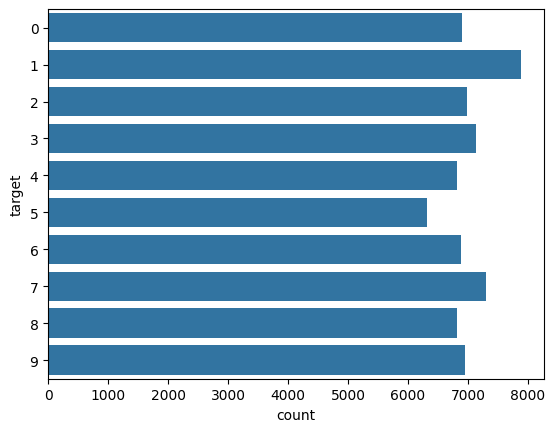

In [35]:
sns.countplot(mnist_df["target"])

(array([6313., 6903., 6824., 7877., 6958., 6990., 7141., 6876., 7293.,
        6825.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

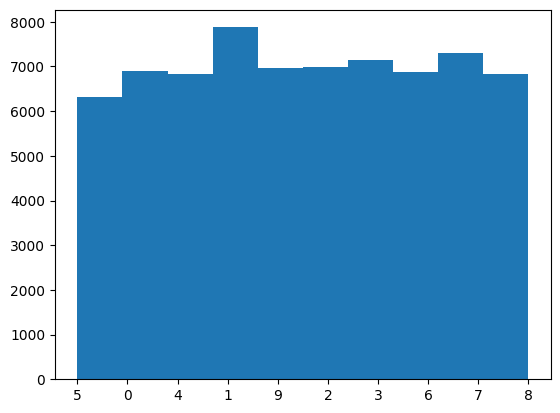

In [40]:
y =mnist_df["target"].values
plt.hist(y)

<Axes: >

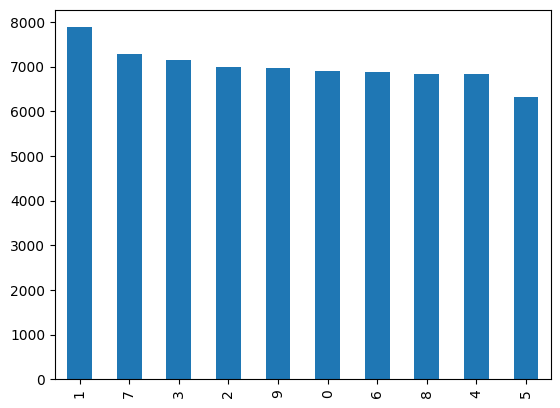

In [44]:

'''x= mnist_df["target"].
y= mnist_df["target"].value_counts()
plt.bar(x,y)'''

mnist_df['target'].value_counts().plot.bar()

In [45]:
# checking the column names and preprocessing target values in standard format
print(mnist_df.keys())
mnist_df["target"] = mnist["target"].astype(np.int64)

Index(['target', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)


In [46]:
mnist_df["target"].dtypes

dtype('int64')

In [47]:
mnist_df["pixel1"].dtypes

dtype('int64')

In [ ]:
mnist_df.dtypes

In [ ]:
#visualising our dataset using matplotlib
image0 = mnist_df.iloc[1,1:]
image0                                                
plt.imshow(np.array(image0).reshape(28,28))

In [ ]:
mnist_df.iloc[1]

In [ ]:
mnist_df.head(10)

In [ ]:
#  Splitting the data into x and y variable
x = mnist_df.iloc[:,1:]
y = mnist_df.iloc[:,0]

In [ ]:
x.shape,y.shape

In [ ]:
# Splitting the data into training and testing set
from sklearn.model_selection import train_test_split
xtrain , xtest ,ytrain, ytest = train_test_split(x,y,test_size =0.2,shuffle = False,random_state =7)

In [ ]:
ytrain.shape,ytest.shape

In [ ]:
xtrain.shape,xtest.shape

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
# making the object of Decision tee
dtree = DecisionTreeClassifier()
# training the training dataset
dtree.fit(xtrain , ytrain)
# predicting the result
start = time.time()
ypred = dtree.predict(xtest)
end = time.time()
eval_time = end - start
print(f"Evaluation time: {eval_time:.2f} seconds")

In [ ]:
# Evaluting the model
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
# Calculating accuracy and plotting confusion matrix using heatmap
cmdtree = confusion_matrix(ytest,ypred)
plt.figure(figsize=(10,7))
sns.heatmap(cmdtree ,annot=True , fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')
dtree_accuracy =dtree.score(xtest,ytest)
print("Accuracy of decision tree is ",dtree_accuracy)


### Classification report of decision tree

In [ ]:
 print(classification_report(ytest,ypred))

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# making the instance of RandomForestClassifier
rforest = RandomForestClassifier()
# training the model
rforest.fit(xtrain , ytrain)
# predicting the result
start = time.time()
ypred = rforest.predict(xtest)
end = time.time()
eval_time = end - start
print(f"Evaluation time: {eval_time:.2f} seconds")

In [ ]:
# Calculating the accuracy and confusion matrix
cmrforest = confusion_matrix(ytest , ypred)
plt.figure(figsize=(10,7))
sns.heatmap(cmrforest ,annot=True , fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')
rforest_accuracy =rforest.score(xtest,ytest)
print("Accuracy of the random forest is ",rforest_accuracy)

### Classification of random forest

In [ ]:
print(classification_report(ytest,ypred))

In [ ]:
ypred

In [ ]:
ytest

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# making the instance of the KNeighborsClassifier
knn = KNeighborsClassifier()
# training the model
knn.fit(xtrain ,ytrain)
# predicting the results
start = time.time()
ypred = knn.predict(xtest)
end = time.time()
eval_time = end - start
print(f"Evaluation time: {eval_time:.2f} seconds")


In [ ]:
# evalution metrics
knn = confusion_matrix(ytest , ypred)
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(knn ,annot=True , fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')
knn_accuracy = accuracy_score(ytest,ypred)
print("Accuracy of knn is",knn_accuracy)

### Classification report of KNN

In [ ]:
 print(classification_report(ytest,ypred))

In [ ]:
# final accuracy report
final_report ={
    'Decision Tree':dtree_accuracy,
    'Random Forest':rforest_accuracy,
    'KNN':knn_accuracy   
}
pd.DataFrame(final_report,index= ["Accuracy"])